In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import json
import ast

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

import os
# 1. Load datasets
movies_df = pd.read_csv("C:/Users/arjun/Downloads/archive (1)/tmdb_5000_movies.csv")
credits_df = pd.read_csv("C:/Users/arjun/Downloads/archive (1)/tmdb_5000_credits.csv")




In [2]:
print("--- Movies DataFrame Exploration ---")
print(f"Shape: {movies_df.shape}")
print("\nColumns:")
movies_df.columns
print("\nInfo:")
movies_df.info()
print("\nFirst row:")
movies_df.head(1)

--- Movies DataFrame Exploration ---
Shape: (4803, 20)

Columns:

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [3]:
print("\nMissing Values Summary:")
print(movies_df.isnull().sum())
print("\nNumeric Columns Description:")
numeric_cols_movies = movies_df.select_dtypes(include=np.number).columns
numeric_cols_movies


Missing Values Summary:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Numeric Columns Description:


Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
print("--- Credits DataFrame Exploration ---")
print(f"Shape: {credits_df.shape}")
print("\nColumns:")
credits_df.columns
print("\nInfo:")
credits_df.info()
print("\nFirst row:")
credits_df.head(1)

--- Credits DataFrame Exploration ---
Shape: (4803, 4)

Columns:

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB

First row:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
print("\nMissing Values Summary:")
print(credits_df.isnull().sum())


Missing Values Summary:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


In [6]:
credits_df.rename(columns={'movie_id':'id'}, inplace=True)
merged_df = movies_df.merge(credits_df, on='id')
print("\n--- Merged DataFrame Exploration ---")
print(f"Shape after merge: {merged_df.shape}")
print("\nColumns of merged DataFrame:")
print(merged_df.columns)
print("\nInfo of merged DataFrame:")
merged_df.info()
print("\nFirst Row of merged DataFrame:")
merged_df.head(1)


--- Merged DataFrame Exploration ---
Shape after merge: (4803, 23)

Columns of merged DataFrame:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

Info of merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


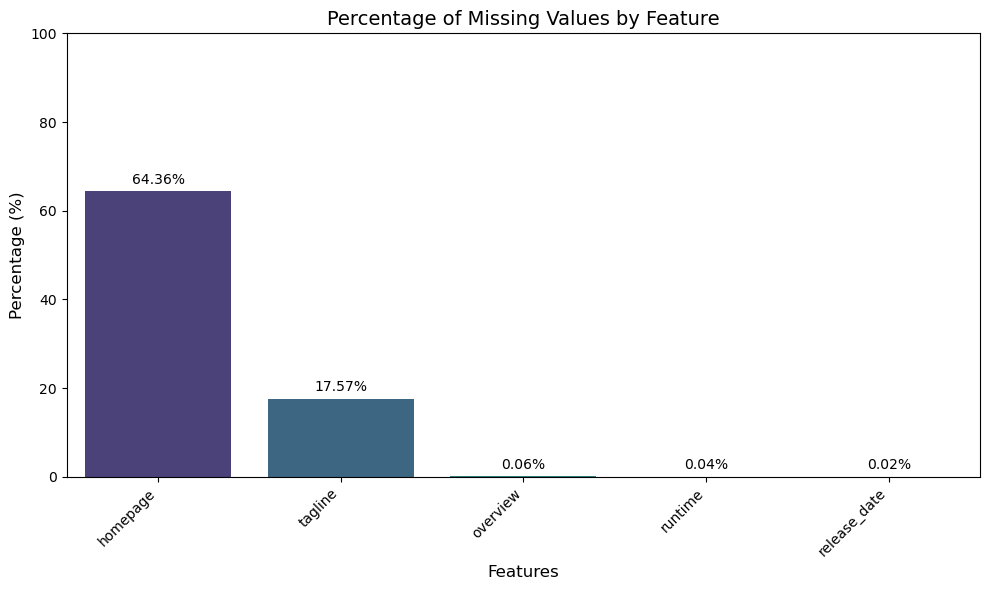

In [7]:
missing_percent = (merged_df.isnull().sum() / len(merged_df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")
plt.title('Percentage of Missing Values by Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

for index, value in enumerate(missing_percent):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

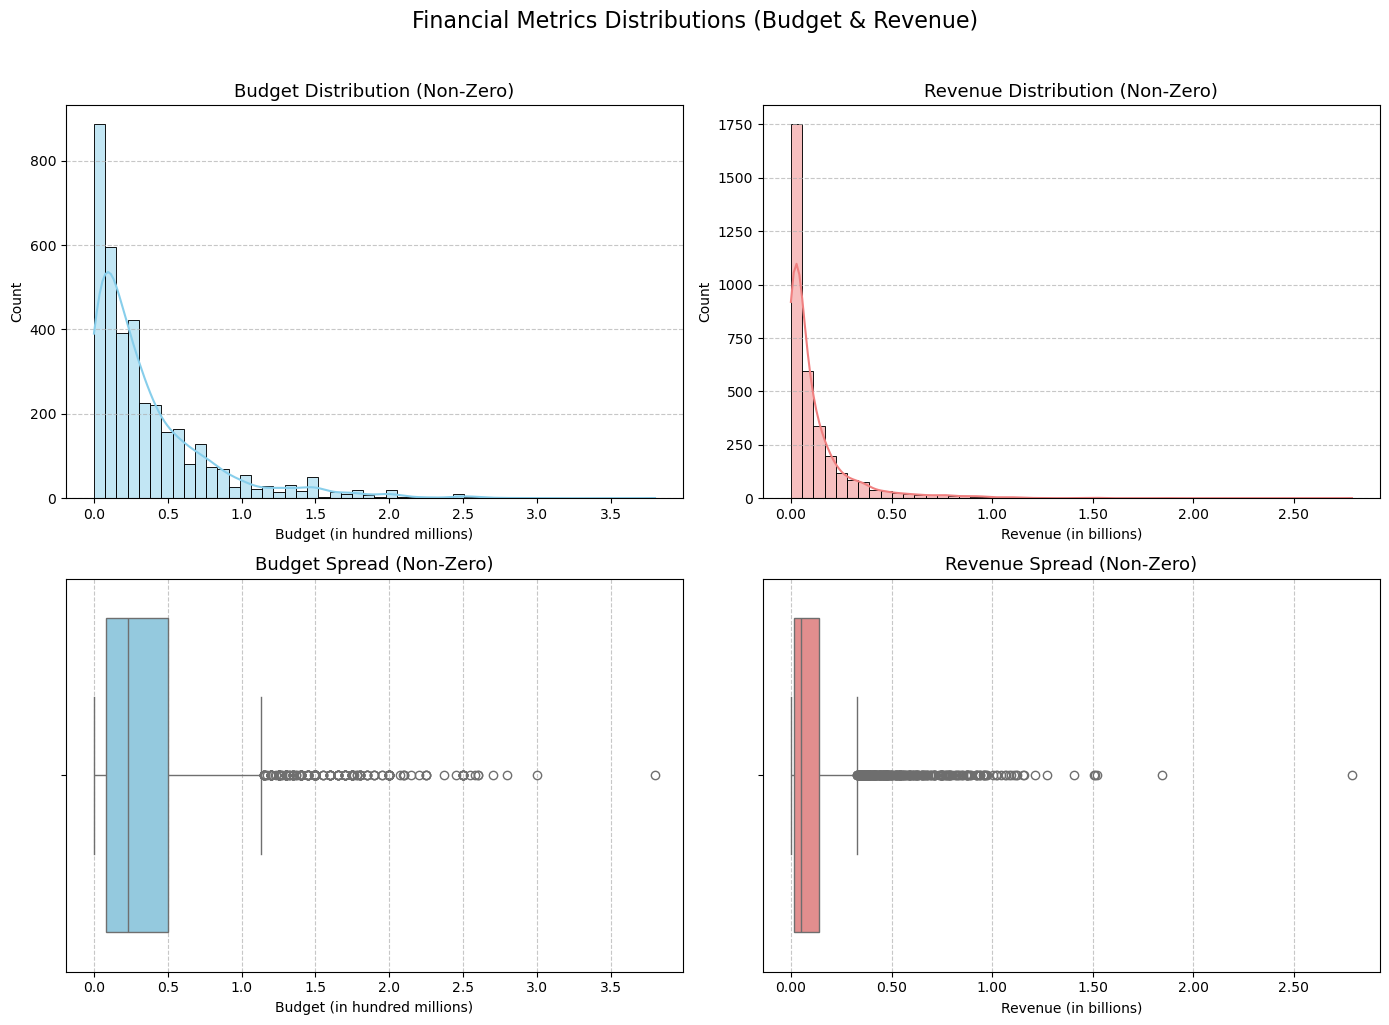

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#  Budget 
budget_filtered = merged_df[merged_df['budget'] > 0]['budget']

sns.histplot(budget_filtered, bins=50, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Budget Distribution (Non-Zero)', fontsize=13)
axes[0, 0].set_xlabel('Budget (in hundred millions)')
axes[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e8:.1f}'))
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(x=budget_filtered, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Budget Spread (Non-Zero)', fontsize=13)
axes[1, 0].set_xlabel('Budget (in hundred millions)')
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e8:.1f}'))
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.7)


#  Revenue
revenue_filtered = merged_df[merged_df['revenue'] > 0]['revenue']

sns.histplot(revenue_filtered, bins=50, kde=True, color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Revenue Distribution (Non-Zero)', fontsize=13)
axes[0, 1].set_xlabel('Revenue (in billions)')
axes[0, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e9:.2f}'))
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(x=revenue_filtered, color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Revenue Spread (Non-Zero)', fontsize=13)
axes[1, 1].set_xlabel('Revenue (in billions)')
axes[1, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e9:.2f}'))
axes[1, 1].grid(axis='x', linestyle='--', alpha=0.7)

plt.suptitle('Financial Metrics Distributions (Budget & Revenue)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<div style="background-color:#FEFCE8; padding:10px; border-radius:8px; border-left: 5px solid #FACC15; margin-top:10px; margin-bottom:10px;">
  <h3 style="margin: 0 0 5px 0; color: #A16207;">Observations: Budget & Revenue</h3>
  <ul style="color:#CA8A04; margin: 0 0 0 20px; padding-left: 0;">
      <li style="margin-bottom: 3px;">Both <strong>Budget</strong> and <strong>Revenue</strong> distributions (excluding zero values) are heavily right-skewed. This indicates that most movies have relatively lower budgets/revenues, while a smaller number of films have extremely high figures.</li>
      <li style="margin-bottom: 3px;">The histograms show the concentration of movies at the lower end of the financial spectrum.</li>
      <li>The boxplots clearly illustrate the wide spread and the presence of numerous outliers (high-budget blockbusters / high-grossing films) for both variables.</li>
  </ul>
</div>

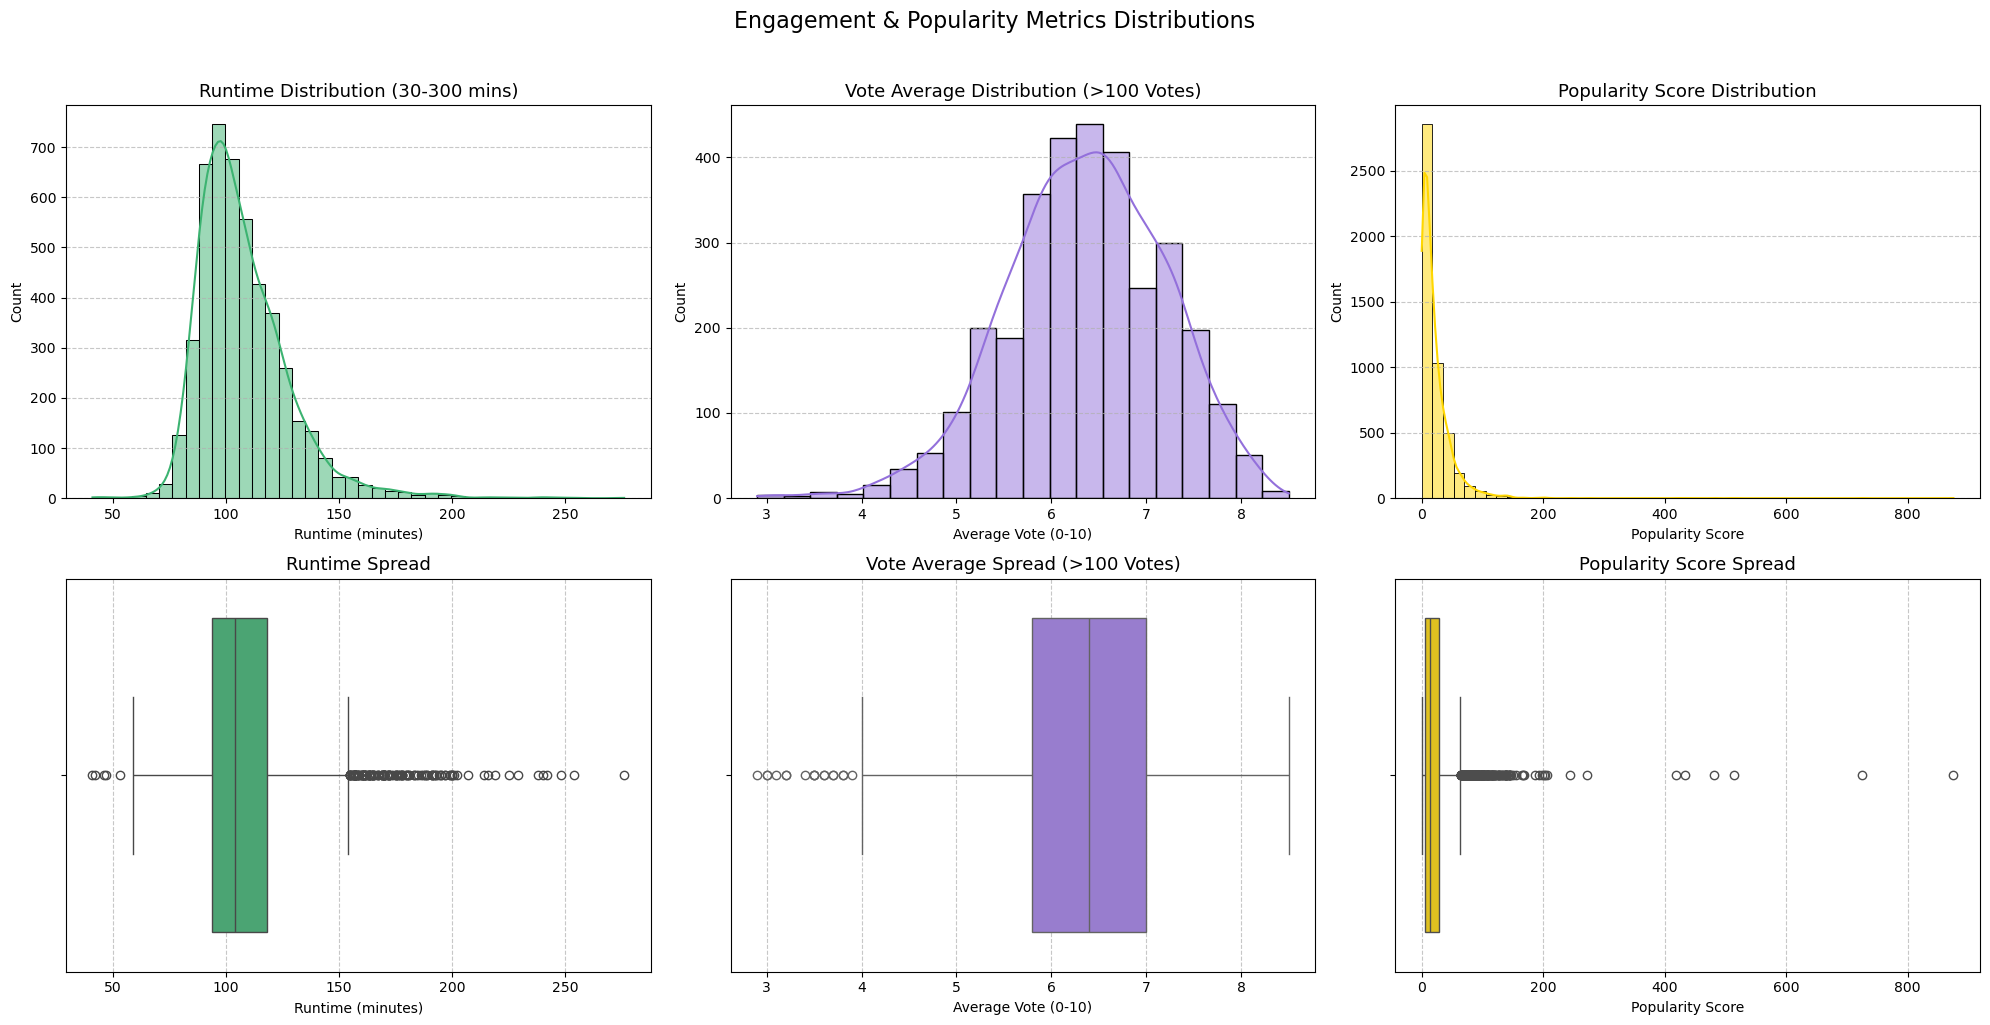

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

runtime_filtered = merged_df[(merged_df['runtime'].notna()) & (merged_df['runtime'] > 30) & (merged_df['runtime'] < 300)]['runtime']

sns.histplot(runtime_filtered, bins=40, kde=True, color='mediumseagreen', ax=axes[0, 0])
axes[0, 0].set_title('Runtime Distribution (30-300 mins)', fontsize=13)
axes[0, 0].set_xlabel('Runtime (minutes)')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(x=runtime_filtered, color='mediumseagreen', ax=axes[1, 0])
axes[1, 0].set_title('Runtime Spread', fontsize=13)
axes[1, 0].set_xlabel('Runtime (minutes)')
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.7)


#  Vote Average 
vote_avg_filtered = merged_df[merged_df['vote_count'] > 100]['vote_average']

sns.histplot(vote_avg_filtered, bins=20, kde=True, color='mediumpurple', ax=axes[0, 1])
axes[0, 1].set_title('Vote Average Distribution (>100 Votes)', fontsize=13)
axes[0, 1].set_xlabel('Average Vote (0-10)')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(x=vote_avg_filtered, color='mediumpurple', ax=axes[1, 1])
axes[1, 1].set_title('Vote Average Spread (>100 Votes)', fontsize=13)
axes[1, 1].set_xlabel('Average Vote (0-10)')
axes[1, 1].grid(axis='x', linestyle='--', alpha=0.7)


#  Popularity 
popularity_filtered = merged_df['popularity']

sns.histplot(popularity_filtered, bins=50, kde=True, color='gold', ax=axes[0, 2])
axes[0, 2].set_title('Popularity Score Distribution', fontsize=13)
axes[0, 2].set_xlabel('Popularity Score')
axes[0, 2].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(x=popularity_filtered, color='gold', ax=axes[1, 2])
axes[1, 2].set_title('Popularity Score Spread', fontsize=13)
axes[1, 2].set_xlabel('Popularity Score')
axes[1, 2].grid(axis='x', linestyle='--', alpha=0.7)


# --- Adjust Layout & Show ---
plt.suptitle('Engagement & Popularity Metrics Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Number of movies included in scatter plots (Budget/Revenue > 1000, Vote Count > 100): 2702


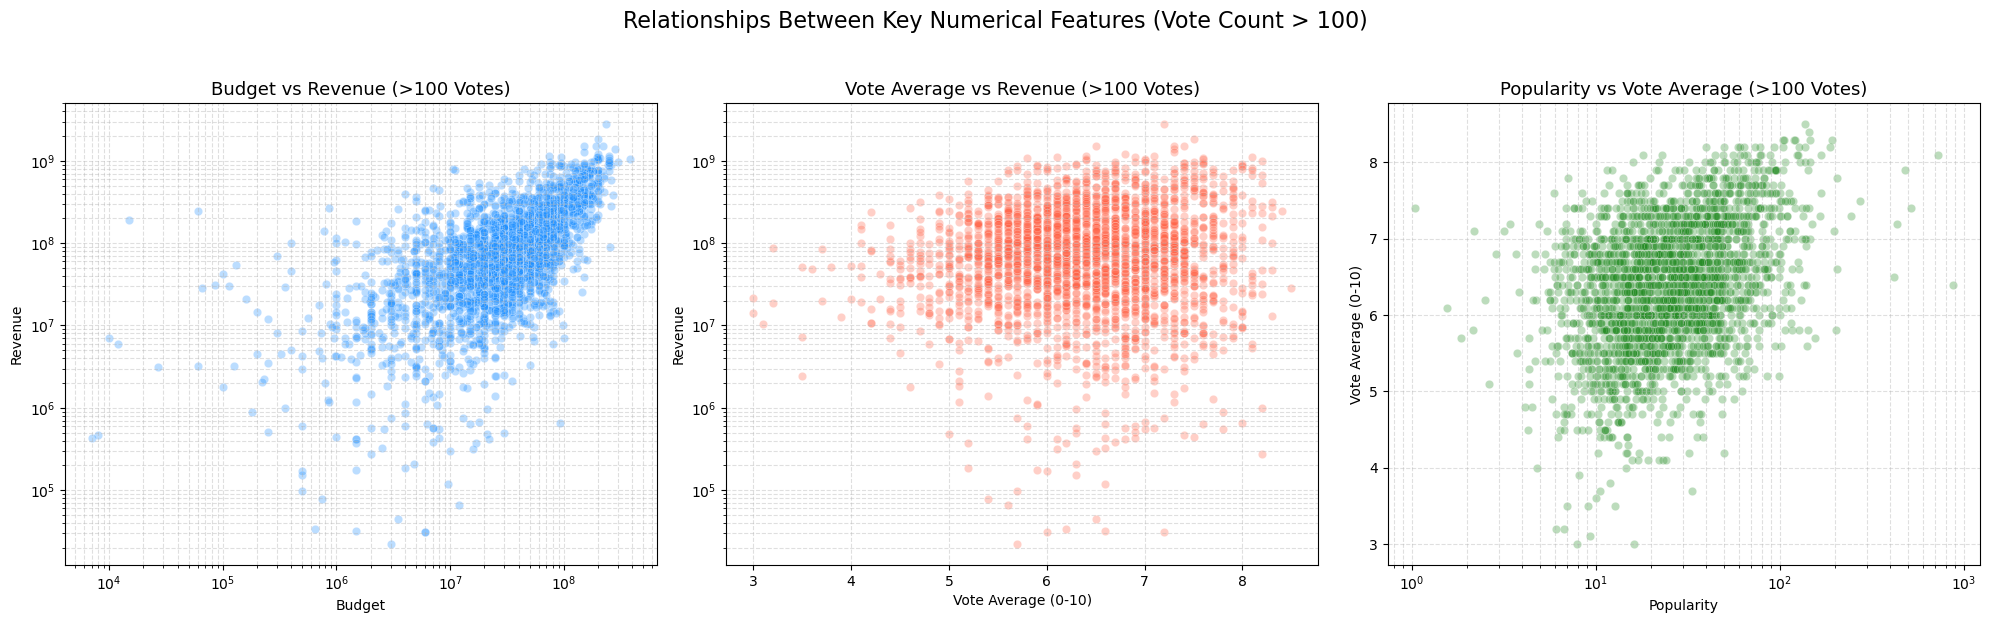

In [11]:
scatter_df = merged_df[(merged_df['budget'] > 1000) & (merged_df['revenue'] > 1000) & (merged_df['vote_count'] > 100)].copy()

print(f"Number of movies included in scatter plots (Budget/Revenue > 1000, Vote Count > 100): {len(scatter_df)}")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#  Budget vs Revenue
sns.scatterplot(data=scatter_df, x='budget', y='revenue', alpha=0.3, color='dodgerblue', ax=axes[0])
axes[0].set_title('Budget vs Revenue (>100 Votes)', fontsize=13)
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Revenue')

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].grid(True, which='both', linestyle='--', alpha=0.4)

#  Vote Average vs Revenue 
sns.scatterplot(data=scatter_df, x='vote_average', y='revenue', alpha=0.3, color='tomato', ax=axes[1])
axes[1].set_title('Vote Average vs Revenue (>100 Votes)', fontsize=13)
axes[1].set_xlabel('Vote Average (0-10)')
axes[1].set_ylabel('Revenue')
axes[1].set_yscale('log')
axes[1].grid(True, which='both', linestyle='--', alpha=0.4)


#  Popularity vs Vote Average 
sns.scatterplot(data=scatter_df, x='popularity', y='vote_average', alpha=0.3, color='forestgreen', ax=axes[2])
axes[2].set_title('Popularity vs Vote Average (>100 Votes)', fontsize=13)
axes[2].set_xlabel('Popularity')
axes[2].set_ylabel('Vote Average (0-10)')
axes[2].set_xscale('log')
axes[2].grid(True, which='both', linestyle='--', alpha=0.4)


plt.suptitle('Relationships Between Key Numerical Features (Vote Count > 100)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

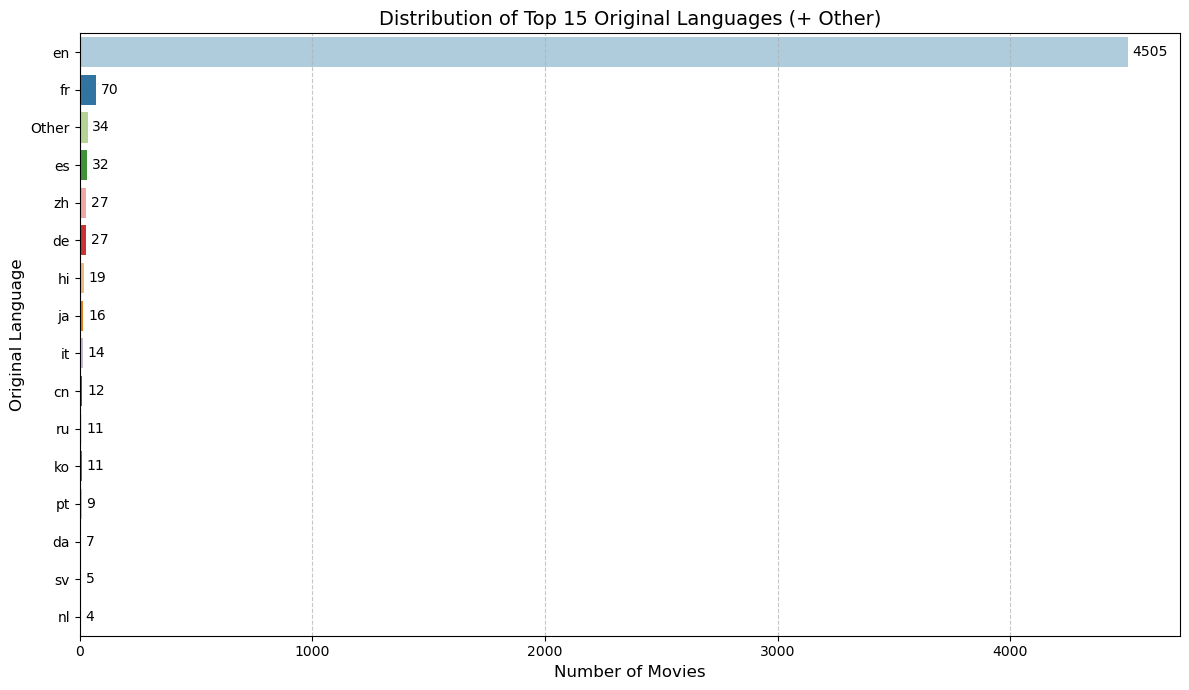

In [12]:
plt.figure(figsize=(12, 7))
# Get top N languages, group the rest into 'Other'
top_n = 15
top_languages = merged_df['original_language'].value_counts().nlargest(top_n).index
# Create a new series where languages not in top N are replaced with 'Other'
language_counts = merged_df['original_language'].apply(lambda x: x if x in top_languages else 'Other')

# Get the order for plotting based on frequency
plot_order = language_counts.value_counts().index

sns.countplot(y=language_counts, order=plot_order, palette='Paired')
plt.title(f'Distribution of Top {top_n} Original Languages (+ Other)', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Original Language', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add counts at the end of the bars
for i, count in enumerate(language_counts.value_counts(sort=True)):
    plt.text(count + 20, i, str(count), va='center', fontsize=10) # Adjust position slightly

plt.tight_layout()
plt.show()

In [13]:
import ast # Ensure ast is imported

#  Handle Duplicate Titles 
titles_match = (merged_df['title_x'] == merged_df['title_y']).all()
print(f"Do title_x and title_y columns match for all rows? {titles_match}")

if titles_match:
    merged_df.rename(columns={'title_x': 'title'}, inplace=True)
    merged_df.drop('title_y', axis=1, inplace=True)
    print("Renamed 'title_x' to 'title' and dropped 'title_y'.")
else:
    print("Warning: title_x and title_y do not match for all rows. Manual inspection needed.")


# Function to Parse JSON Columns 
def parse_json_list(data_str, key_name='name'):
    """
    Safely parses a JSON-like string list of dictionaries
    and extracts the value associated with key_name (default 'name').
    """
    if isinstance(data_str, str) and data_str.startswith('['):
        try:
            parsed_list = ast.literal_eval(data_str)
            return [item[key_name] for item in parsed_list if key_name in item]
        except (ValueError, SyntaxError):
            return []
    return []

# Function to Extract Director 
def get_director(data_str):
    """
    Parses the 'crew' JSON-like string and extracts the director's name.
    """
    if isinstance(data_str, str) and data_str.startswith('['):
        try:
            parsed_list = ast.literal_eval(data_str)
            for member in parsed_list:
                if isinstance(member, dict) and member.get('job') == 'Director':
                    return member.get('name')
        except (ValueError, SyntaxError):
            return None
    return None


# --- Parse 'genres' and 'keywords' ---
print("\nParsing 'genres' column...")
merged_df['parsed_genres'] = merged_df['genres'].apply(parse_json_list)
print("Parsing 'keywords' column...")
merged_df['parsed_keywords'] = merged_df['keywords'].apply(parse_json_list)

# --- Parse 'cast' (Get Top 3 Actors) ---
print("Parsing 'cast' column (extracting top 3 actors)...")
merged_df['parsed_cast_all'] = merged_df['cast'].apply(parse_json_list)
merged_df['parsed_cast_top3'] = merged_df['parsed_cast_all'].apply(lambda x: x[:3] if isinstance(x, list) else [])

# --- Parse 'crew' (Get Director) ---
print("Parsing 'crew' column (extracting director)...")
merged_df['director'] = merged_df['crew'].apply(get_director)

merged_df.drop(['genres', 'keywords', 'cast', 'crew', 'parsed_cast_all'], axis=1, inplace=True)
print("\nDropped original JSON and intermediate columns.")

Do title_x and title_y columns match for all rows? True
Renamed 'title_x' to 'title' and dropped 'title_y'.

Parsing 'genres' column...
Parsing 'keywords' column...
Parsing 'cast' column (extracting top 3 actors)...
Parsing 'crew' column (extracting director)...

Dropped original JSON and intermediate columns.


In [14]:
merged_df.head(1)

,budget,homepage,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,parsed_genres,parsed_keywords,parsed_cast_top3,director
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron


In [15]:
# --- Convert Release Date ---
print("\nConverting 'release_date' to datetime objects...")

merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

failed_dates = merged_df['release_date'].isnull().sum()
print(f"Number of rows with invalid/missing release dates (converted to NaT): {failed_dates}")

merged_df['release_year'] = merged_df['release_date'].dt.year.fillna(0).astype(int)

print("Created 'release_year' column.")
print("Sample 'release_date' and 'release_year':")
print(merged_df[['title', 'release_date', 'release_year']].head())


# Handle Missing Overview 
print(f"\nNumber of rows before dropping missing overviews: {len(merged_df)}")
initial_missing_overview = merged_df['overview'].isnull().sum()
print(f"Number of missing 'overview' values: {initial_missing_overview}")

merged_df.dropna(subset=['overview'], inplace=True)
merged_df = merged_df[merged_df['overview'].str.strip() != '']

print(f"Number of rows after dropping missing overviews: {len(merged_df)}")

print("\nValue counts for 'status' column:")
print(merged_df['status'].value_counts())


merged_df.reset_index(drop=True, inplace=True)
print("\nDataFrame index reset.")


Converting 'release_date' to datetime objects...
Number of rows with invalid/missing release dates (converted to NaT): 1
Created 'release_year' column.
Sample 'release_date' and 'release_year':
                                      title release_date  release_year
0                                    Avatar   2009-12-10          2009
1  Pirates of the Caribbean: At World's End   2007-05-19          2007
2                                   Spectre   2015-10-26          2015
3                     The Dark Knight Rises   2012-07-16          2012
4                               John Carter   2012-03-07          2012

Number of rows before dropping missing overviews: 4803
Number of missing 'overview' values: 3
Number of rows after dropping missing overviews: 4799

Value counts for 'status' column:
status
Released           4792
Rumored               4
Post Production       3
Name: count, dtype: int64

DataFrame index reset.


In [16]:
C = merged_df['vote_average'].mean()
print(f"Mean vote average across all movies (C): {C:.4f}")

merged_df['vote_count'] = pd.to_numeric(merged_df['vote_count'], errors='coerce').fillna(0)
m = merged_df['vote_count'].quantile(0.90)
print(f"Minimum votes required (m - 90th percentile): {m:.0f}")

def calculate_weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDb formula
    return (v / (v + m)) * R + (m / (v + m)) * C

merged_df['weighted_rating'] = merged_df.apply(calculate_weighted_rating, axis=1)

print("Sample comparison of vote_average and weighted_rating:")
print(merged_df[['title', 'vote_count', 'vote_average', 'weighted_rating']].sort_values('vote_count', ascending=False).head())
print("\nMovies with fewer votes pulled towards the mean:")
print(merged_df[['title', 'vote_count', 'vote_average', 'weighted_rating']].sort_values('vote_count', ascending=True).head())

Mean vote average across all movies (C): 6.0932
Minimum votes required (m - 90th percentile): 1842
Sample comparison of vote_average and weighted_rating:
               title  vote_count  vote_average  weighted_rating
96         Inception       13752           8.1         7.862928
65   The Dark Knight       12002           8.2         7.919654
0             Avatar       11800           7.2         7.050539
16      The Avengers       11776           7.4         7.223221
788         Deadpool       10995           7.4         7.212466

Movies with fewer votes pulled towards the mean:
                            title  vote_count  vote_average  weighted_rating
4184  A Beginner's Guide to Snuff           0           0.0         6.093186
4688          Theresa Is a Mother           0           0.0         6.093186
4690       Archaeology of a Woman           0           0.0         6.093186
4694               Butterfly Girl           0           0.0         6.093186
4695            The World I

In [17]:
def create_corpus(row):
    genres_list = row['parsed_genres'] if isinstance(row['parsed_genres'], list) else []
    keywords_list = row['parsed_keywords'] if isinstance(row['parsed_keywords'], list) else []

    genres_str = ' '.join([g.replace(' ', '') for g in genres_list])
    keywords_str = ' '.join([k.replace(' ', '') for k in keywords_list])

    overview_str = str(row['overview']) if pd.notna(row['overview']) else ''

    corpus = f"{overview_str} Genres: {genres_str}. Keywords: {keywords_str}."
  
    return corpus.strip()

merged_df['corpus'] = merged_df.apply(create_corpus, axis=1)

print("Created 'corpus' column by combining overview, genres, and keywords.")
print("\n--- Example Corpus Entries ---")
print(merged_df['title'][1])
print(merged_df['corpus'][1])

empty_corpus_count = (merged_df['corpus'] == '').sum()
print(f"\nNumber of movies with an empty corpus: {empty_corpus_count}")

Created 'corpus' column by combining overview, genres, and keywords.

--- Example Corpus Entries ---
Pirates of the Caribbean: At World's End
Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems. Genres: Adventure Fantasy Action. Keywords: ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger.

Number of movies with an empty corpus: 0


In [18]:
print(merged_df.columns)
columns_to_keep = [
    'id',
    'title',
    'overview',
    'corpus',     
    'parsed_genres',
    'parsed_keywords',
    'parsed_cast_top3',
    'director',
    'release_year',
    'weighted_rating'
]

final_df = merged_df[columns_to_keep].copy()

print(f"Created final DataFrame with {len(final_df.columns)} selected columns.")
print("\nColumns in final DataFrame:")
print(final_df.columns)

print("\nInfo of final DataFrame:")
final_df.info()

Index(['budget', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'parsed_genres', 'parsed_keywords', 'parsed_cast_top3',
       'director', 'release_year', 'weighted_rating', 'corpus'],
      dtype='object')
Created final DataFrame with 10 selected columns.

Columns in final DataFrame:
Index(['id', 'title', 'overview', 'corpus', 'parsed_genres', 'parsed_keywords',
       'parsed_cast_top3', 'director', 'release_year', 'weighted_rating'],
      dtype='object')

Info of final DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4799 non-null   int64  
 1   title             4799 non-n

In [ ]:
try:
    model = SentenceTransformer('all-MiniLM-L6-v2')
    print('model loaded successfully')
except Exception as e:
    print(e)
    exit()

corpus_texts = final_df['corpus'].fillna('').tolist()
print(f"\nPrepared {len(corpus_texts)} text documents from the 'corpus' column.")

print('\nGenerating embedings')
movie_embeddings=model.encode(corpus_texts, show_progress_bar=True)
print(f'\nShape of the generated embeddings array: {movie_embeddings.shape}')

model loaded successfully

Prepared 4799 text documents from the 'corpus' column.

Generating embedings


Batches:   0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
output_dir = './'

embeddings_filename = os.path.join(output_dir, 'movie_embeddings.npy')
metadata_filename = os.path.join(output_dir, 'movie_metadata.parquet')

#  Save Embeddings
print(f"\nSaving embeddings to: {embeddings_filename}")
try:
    np.save(embeddings_filename, movie_embeddings)
    print("Embeddings saved successfully.")
except Exception as e:
    print(f"Error saving embeddings: {e}")


#  Save Metadata DataFrame 
print(f"\nSaving metadata DataFrame to: {metadata_filename}")
try:
    try:
        import pyarrow
    except ImportError:
        print("Installing pyarrow for Parquet support...")
        !pip install pyarrow -q
        import pyarrow

    final_df.to_parquet(metadata_filename, index=False)
    print("Metadata DataFrame saved successfully (as Parquet).")

except Exception as e:
    print(f"Error saving metadata DataFrame: {e}")


# Final Check 
print("\n--- Artifact Saving Complete ---")
print(f"Embeddings array shape: {movie_embeddings.shape}")
print(f"Metadata DataFrame shape: {final_df.shape}")
print(f"- {embeddings_filename}")
print(f"- {metadata_filename}")